# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | boende
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 4 of Set 1 | zemio
Processing Record 5 of Set 1 | klaebu
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | asyut
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | barawe
City not found. Skipping...
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | krasnoarmeysk
Processing Record 16 of Set 1 | himensulan
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | ksenyevka
City not found. Skipping...
Processing Record 19 of Set 1 | sabya
Processing Record 20 of Set 1 | dikson
Processing R

Processing Record 31 of Set 4 | alice springs
Processing Record 32 of Set 4 | zasheyek
Processing Record 33 of Set 4 | balikpapan
Processing Record 34 of Set 4 | praia
Processing Record 35 of Set 4 | gwadar
Processing Record 36 of Set 4 | luderitz
Processing Record 37 of Set 4 | genhe
Processing Record 38 of Set 4 | kjollefjord
Processing Record 39 of Set 4 | kaeo
Processing Record 40 of Set 4 | brasileia
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | tautira
Processing Record 43 of Set 4 | sumbe
Processing Record 44 of Set 4 | ketchikan
Processing Record 45 of Set 4 | santa isabel do rio negro
Processing Record 46 of Set 4 | tessalit
Processing Record 47 of Set 4 | fairhope
Processing Record 48 of Set 4 | winslow
Processing Record 49 of Set 4 | castro
Processing Record 0 of Set 5 | almenara
Processing Record 1 of Set 5 | lodja
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | mapiripan
Processing Record 4 of Set 5 | mys shmidta
City not f

City not found. Skipping...
Processing Record 20 of Set 8 | lasa
Processing Record 21 of Set 8 | mbandaka
Processing Record 22 of Set 8 | hobyo
Processing Record 23 of Set 8 | pacific grove
Processing Record 24 of Set 8 | saint george
Processing Record 25 of Set 8 | kirando
Processing Record 26 of Set 8 | williams lake
Processing Record 27 of Set 8 | touros
Processing Record 28 of Set 8 | gharo
Processing Record 29 of Set 8 | lagoa
Processing Record 30 of Set 8 | dalsingh sarai
Processing Record 31 of Set 8 | ixtapa
Processing Record 32 of Set 8 | aripuana
Processing Record 33 of Set 8 | birobidzhan
Processing Record 34 of Set 8 | moose jaw
Processing Record 35 of Set 8 | piacabucu
Processing Record 36 of Set 8 | moranbah
Processing Record 37 of Set 8 | wanning
Processing Record 38 of Set 8 | wewak
Processing Record 39 of Set 8 | barcelos
Processing Record 40 of Set 8 | codrington
Processing Record 41 of Set 8 | arlit
Processing Record 42 of Set 8 | havre-saint-pierre
Processing Record

City not found. Skipping...
Processing Record 7 of Set 12 | payo
Processing Record 8 of Set 12 | springbok
Processing Record 9 of Set 12 | ornskoldsvik
Processing Record 10 of Set 12 | guiyang
Processing Record 11 of Set 12 | kutum
Processing Record 12 of Set 12 | chatellerault
Processing Record 13 of Set 12 | letlhakane
Processing Record 14 of Set 12 | dabou
Processing Record 15 of Set 12 | da nang
Processing Record 16 of Set 12 | wlodawa
Processing Record 17 of Set 12 | beibei
Processing Record 18 of Set 12 | nouadhibou
Processing Record 19 of Set 12 | ukiah
Processing Record 20 of Set 12 | the valley
Processing Record 21 of Set 12 | santa barbara
Processing Record 22 of Set 12 | novaya ladoga
Processing Record 23 of Set 12 | khetri
Processing Record 24 of Set 12 | kijang
Processing Record 25 of Set 12 | concordia
Processing Record 26 of Set 12 | palmdale
Processing Record 27 of Set 12 | goderich
Processing Record 28 of Set 12 | carrboro
Processing Record 29 of Set 12 | jiayuguan
Pro

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Boende,-0.2167,20.8667,71.26,97,100,4.03,CD,1669062227
1,Yellowknife,62.4560,-114.3525,28.92,93,75,4.61,CA,1669062264
2,Zemio,5.0314,25.1361,74.80,45,80,1.25,CF,1669062496
3,Klaebu,63.2976,10.4826,28.63,74,100,4.79,NO,1669062497
4,Kapaa,22.0752,-159.3190,82.38,70,0,18.41,US,1669062498


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Boende,-0.2167,20.8667,71.26,97,100,4.03,CD,1669062227
1,Yellowknife,62.4560,-114.3525,28.92,93,75,4.61,CA,1669062264
2,Zemio,5.0314,25.1361,74.80,45,80,1.25,CF,1669062496
3,Klaebu,63.2976,10.4826,28.63,74,100,4.79,NO,1669062497
4,Kapaa,22.0752,-159.3190,82.38,70,0,18.41,US,1669062498


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

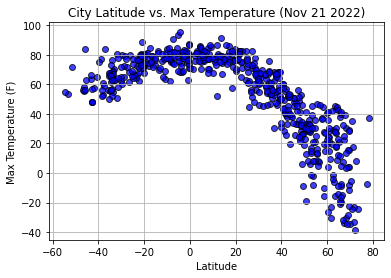

In [11]:
# Build scatter plot for latitude vs. temperature
todays_date = time.ctime(city_data_df['Date'][0])

x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

plot_date = todays_date[4:-14]
plot_year = todays_date[-4:]
plt.title(f"City Latitude vs. Max Temperature ({plot_date} {plot_year})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

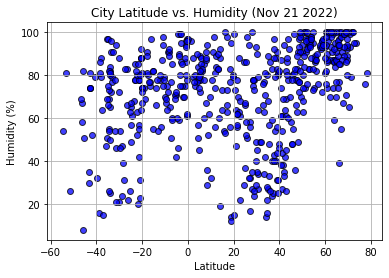

In [12]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({plot_date} {plot_year})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

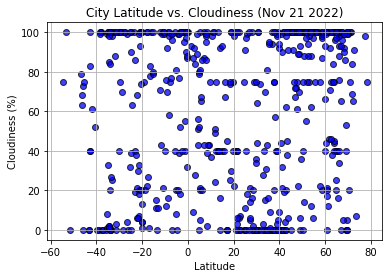

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({plot_date} {plot_year})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

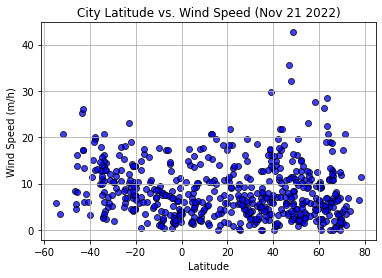

In [14]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/h)')
plt.title(f"City Latitude vs. Wind Speed ({plot_date} {plot_year})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0 ),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Yellowknife,62.4560,-114.3525,28.92,93,75,4.61,CA,1669062264
2,Zemio,5.0314,25.1361,74.80,45,80,1.25,CF,1669062496
3,Klaebu,63.2976,10.4826,28.63,74,100,4.79,NO,1669062497
4,Kapaa,22.0752,-159.3190,82.38,70,0,18.41,US,1669062498
5,Asyut,27.1810,31.1837,70.79,32,5,7.47,EG,1669062499


Text(0.5, 1.0, 'Northern Hemisphere City Latitude vs. Max Temperature (Nov 21 2022)')

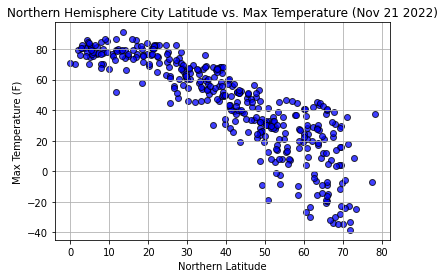

In [16]:
# Define a function to create Linear Regression plots
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature ({plot_date} {plot_year})")

In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0 ),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Boende,-0.2167,20.8667,71.26,97,100,4.03,CD,1669062227
6,Bengkulu,-3.8004,102.2655,74.17,90,77,5.12,ID,1669062503
7,Rikitea,-23.1203,-134.9692,72.05,85,86,10.18,PF,1669062504
9,Punta Arenas,-53.1500,-70.9167,53.62,81,100,3.44,CL,1669062259
10,Vaini,-21.2000,-175.2000,80.76,78,20,6.91,TO,1669062506


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.858193980856868


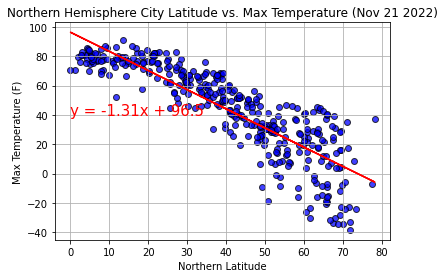

In [18]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature ({plot_date} {plot_year})")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,40),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

The r-value is: 0.6563545219692121


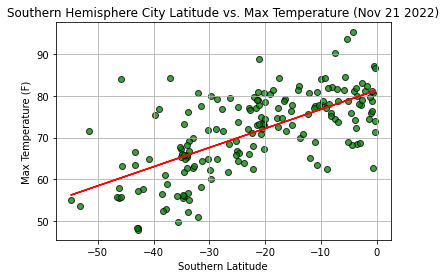

In [19]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "green", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Max Temperature ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a negative correlation (-0.85) for the northern hemisphere and a moderately strong correlation (0.65) for the southern hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3724808205409822


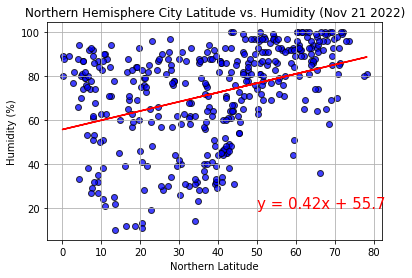

In [58]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Humidity ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(50,20),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

The r-value is: 0.1806240798268368


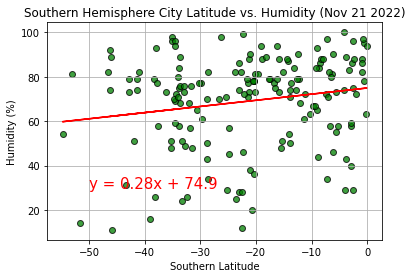

In [60]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "green", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Humidity ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There are slight correlation for both the northern and southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.21273711326655562


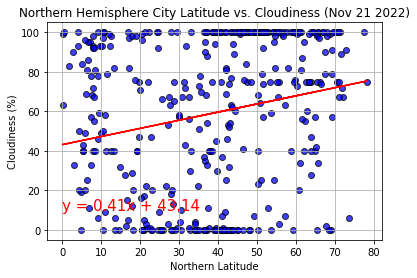

In [61]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

The r-value is: 0.22655705439803941


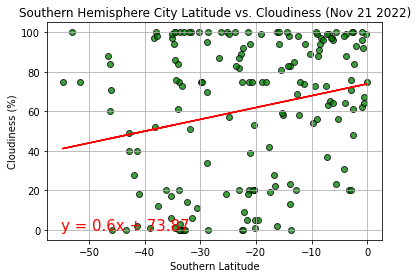

In [62]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "green", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-55,0),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is no correlation between latitude and cloudiness for both, southern and northern hemispheres. Both show scattered values all over the plots. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08138123029686749


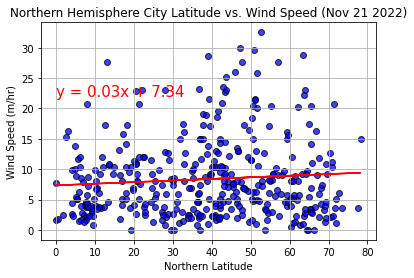

In [63]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed (m/hr)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,22),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

The r-value is: -0.3735181225724481


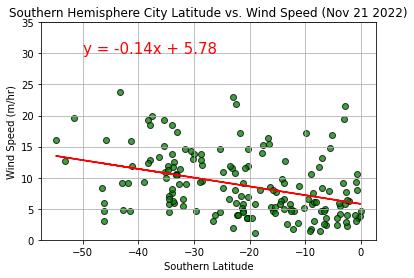

In [64]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "green", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed (m/hr)')
plt.ylim(0,35)
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is no correlation between latitude and wind speed either, for both hemispheres. Both show evenly scattered values over the latitudes.